# Predicting Product Returns Using K-Nearest Neighbors (KNN) - Cross-Validation

## Review

Recall that we have a dataset that records if a customer returned their purchase.
* Features: characteristics of the purchase and the customer
* Target: `returned`: 0 or 1

### Preprocessing

First, perform **one-hot encoding**

In [1]:
# Identify the columns to encode


Second, let's:
* Seperate the target (y) from the features (X)
* Perform feature scaling
* Perform train-test split

In [2]:
# Seperate the target (y) from the features (X)


# Feature scaling


# Train-test split


### KNN classification

We now create and fit a KNN model.

Let's predict for the following new purchases.

|**Product Category**|**Location**|**Order Size**|**Price**|**Coupon**| **Return_Last_Year**|**Total_Purchase_Last_Year** |
|--------------------|------------|--------------|---------|----------|-----------|--------------|
| Home               |  city      |  3           |   99.99 |   no     |   5       |   300.45     |
| Sports             |  rural     |  2           |    12   |   yes    |   0       |    500.99    |

Recall the features after the one-hot encoding:

We will construct a dictionary to represent the new data points:
* The indexes of the dictionary are the feature names
* For each index, the value of the disctionary is a list of feature values 

Let's predict for the two new purchases.

So the model predicts that the first purchase will be returned, and the second one will not.

The DataFrame for those new data points is already one-hot encoded. But it is not scaled yet!

* Since the model is trained on the scaled training data, we need to predict based on scaled features.

* We will need to apply the same scaler on the new data points!

### Cross validation

Cross-validation is a technique used to assess the performance and generalizability of a model by dividing the dataset into multiple subsets.

Process of the k-fold cross validation:
* The data is split into $k$ equal parts (called **folds**) for $k$-fold cross-validation.
* The model is trained on $k-1$ folds and tested on the remaining fold. 
* This process is repeated $k$ times, each time using a different fold as the test set.

**Output**: The performance metrics (e.g., accuracy, precision, AUC) from each fold are averaged to provide a more reliable estimate of the model's performance.

Example: 5-fold cross validation.
* First, divide the dataset into 5 equal folds
* Then, we perforam **5 iterations**
    * Each fold gets a turn to act as the testing dataset; see the following illustrations
  
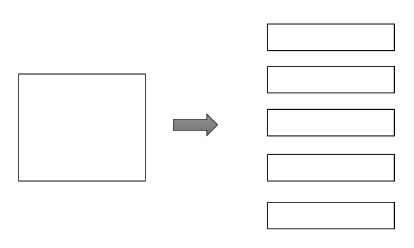

#### First iteration

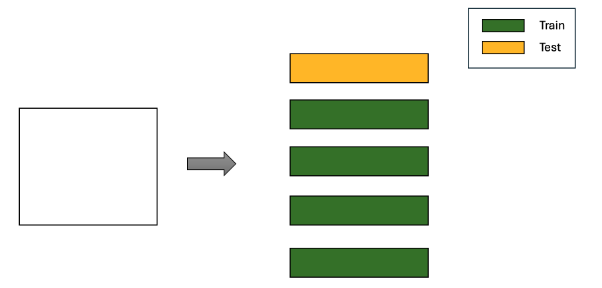

#### Second iteration

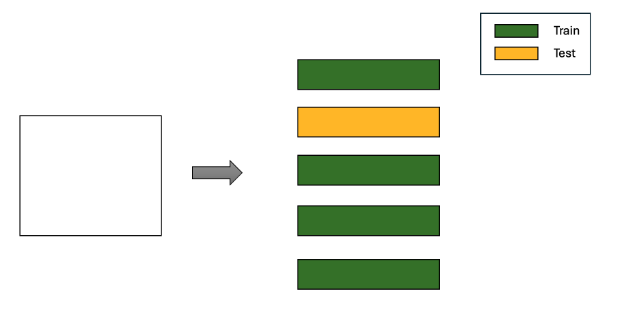

#### Third iteration

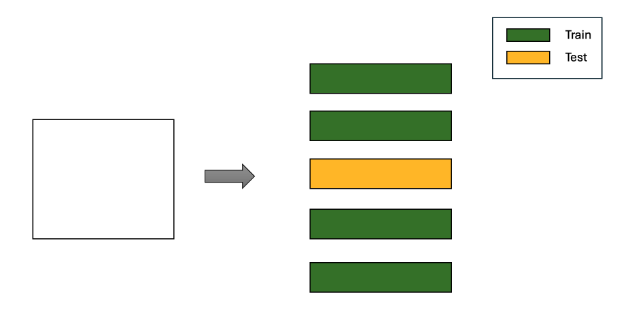

#### Fourth iteration

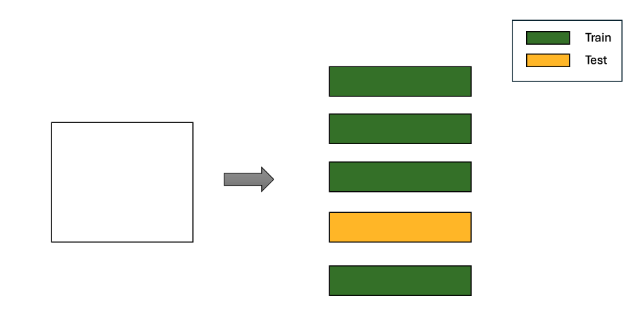

#### Fifth iteration

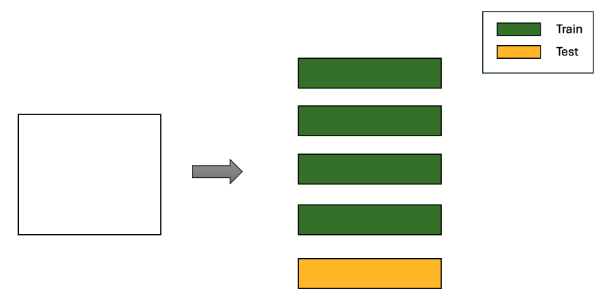

Why cross validation?

* Ensures that the model's performance is **evaluated on multiple test sets**, giving a better indication of how it will perform on unseen data.
* **Makes the most** of a limited dataset by using all data points for both training and testing across different iterations.

To implement cross validation, we first need to define a **cross-validation strategy**.

The `StratifiedKFold()` function from the module `model_selection` in `sklearn` defines a cross-validation strategy.
* 'Stratified' means that the fraction of a class label in each fold are the same. 
* It use the following arguments:
    * `n_splits=` specifies the number of folds
    * `shuffle=True` will shuffle the rows before splitting, effectively randomize the split
    * `random_state=` specifies the random state/see for shuffling, ensuring reproducibility

The function `cross_val_score()` from `sklearn.model_selection` implements cross-validation.

It calculates the performance score (accuracy, precision, auc score, etc.) for all the iterations in a cross validation procedure.
* We need to provide the following argments:
    * The learning model (linear regression, logistic regression, KNN, etc.)
    * features (X) and target (y); the function `cross_val_score()` will do the train-test split on them
    * `cv=` specifies the cross-validation strategy
    * `scoring=` specifies the performance scores to use:
        * Options include accuracy, roc_auc, recall, precision, f1-score. 

**Note**: `cross_val_score()` will split the features X and target y provided as arguments into the given number of folds. 

To evaluation the performance of the model, we take the average of all cv scores.

**Note**: The **mean score** usually serves as the main performance measure for selecting models and hyperparameter tuning.

### Choosing the number of neighbors based on cross-validation

The number of neighbors to use in KNN, `n_neighbors`, is a **hyperparameter**, as it is not chosen during the training/fitting process. 

`GridSearchCV` in `scikit-learn.model_selection` is a powerful tool used to perform **hyperparameter tuning** for machine learning models.

`GridSearchCV` work as follows:

1. **Define a Range of Hyperparameters**: We specify a dictionary where the keys are the hyperparameters you want to tune, and the values are the lists of values to try.

2. It **trains and evaluates the model** for *every combination of hyperparameters* using **cross-validation**, with respect to a given performance score.

In [3]:
# Import the GridSearchCV function

# Define the parameter grid as dictionary. We will only tune 'n_neighbors' here.


# Define the learning model. We use KNN here


# Define the grid search with cross-validation. Note that 'stratified_kfold' is defined earlier.


# By default, scoring='accuracy' is used; but we may change it.

# Fit the grid_search. We need to provide the features (X) and the target (y) before splitting



In the above, we searched for the best value of `n_neighbors` over the range $1,5,9,13,...,101$.

During the fitting process, the model calculates and compares the **average score under cross-validation** for each value in the range defined by `param_grid`. 

**Notes**: 
* In the above, we use `X_train`, `y_train` to fit the grid search.
* This means that for each parameter value in `param_grid`, the cross validation split the training data instead of the full data.
* So `X_test`, `y_test` remain unseen by the model, and can be used to simulate the "future" for the hyperparameter-tuned and cross-validated model.

### Retrieving the best parameter and the best model from the grid search

After fitting, the attritues `.best_params_` and `.best_score_` of the `GridSearchCV` object will give us the best parameter value for maximizing the score, and the corresponding best score.

The `.best_estimator_` attriute of the grid search rerturns the KNN model with the best number of neighbors number.

Let's use the tuned model to predict on the new data point we defined earlier. 

Again, be reminded that:
* when fitting the `GridSearchCV`, we used `grid_search.fit(X_train, y_train)`. This means:
    * We split `X_train` and `y_train` into five folds, each fold gets a turn to be used for evaluating the model score.

* `GridSearchCV` does not see the test dataset `X_test` and `y_test`
    * So they can still be used for simulating the future.